In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

%tensorflow_version 2.x

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/House Prices/data/df_preprocessed.csv", index_col=0)

In [20]:
#@title Build, compile and fit the model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.Sequential([
                             Dense(128, "relu"),
                             #Dropout(0.1),
                             Dense(256, "relu"),
                             #Dropout(0.1),
                             Dense(128, "relu"),
                             Dense(64, "relu"),
                             Dense(1, "relu")
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10,
                                                                  restore_best_weights=True)]
                      )
  
  epochs = history.epoch
  
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return epochs, rmse, history.history   

In [5]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show() 

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   float64
 1   HeatingQC     1459 non-null   float64
 2   CentralAir    1459 non-null   bool   
 3   Electrical    1459 non-null   bool   
 4   1stFlrSF      1459 non-null   float64
 5   GrLivArea     1459 non-null   float64
 6   FullBath      1459 non-null   float64
 7   TotRmsAbvGrd  1459 non-null   float64
 8   GarageFinish  1459 non-null   float64
 9   GarageCars    1459 non-null   float64
 10  GarageArea    1459 non-null   float64
 11  2Types        1459 non-null   int64  
 12  Attchd        1459 non-null   int64  
 13  Basment       1459 non-null   int64  
 14  BuiltIn       1459 non-null   int64  
 15  CarPort       1459 non-null   int64  
 16  Detchd        1459 non-null   int64  
 17  None          1459 non-null   int64  
 18  SalePrice     1459 non-null 

In [7]:
df_train[["CentralAir","Electrical"]] = df_train[["CentralAir","Electrical"]].astype(np.int8)

In [8]:
df_train_shuffled = df_train.reindex(np.random.permutation(df_train.index))

In [ ]:
learning_rate = 0.08
epochs = 50
batch_size = 100
validation_split = 0.2

features = df_train_shuffled.columns[:-1]
label = "SalePrice"

model = tf.keras.Sequential([
                             Dense(256, "relu"),
                             Dropout(0.2),
                             Dense(256, "relu"),
                             Dropout(0.1),
                             Dense(128, "relu"),
                             Dense(64, "relu"),
                             Dense(1, "relu")
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss="mean_squared_error",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model = build_model(learning_rate)
epochs, rmse, history = train_model(model, df_train_shuffled, features, 
                                    label, epochs, batch_size
                                    ,validation_split
                                    )

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [22]:
predicted = model.predict(df_train[features])

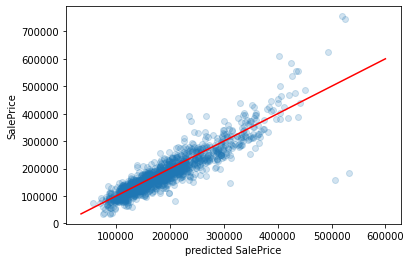

In [23]:
plt.scatter(predicted, df_train.SalePrice, alpha=0.2)
plt.xlabel("predicted SalePrice")
plt.ylabel("SalePrice")
plt.plot([35_000, 600_000], [35_000, 600_000], color = 'r')

In [37]:
model.save("tf_House_Price_Model.h5")